In [ ]:
import requests
import env
from requests.models import Request, Response
from env import Client_ID
import pandas as pd
from igdb.igdbapi_pb2 import GameResult
from typing import Dict, List, Optional, Union, cast
import acquire
import json
from igdb.wrapper import IGDBWrapper

### Connect to API and scrape the data needed
#### get the access token and 200 response 

In [ ]:
def get_api():   
    url = env.get_db_url()
    response = requests.post(url)
    data = response.json()
    access_token = data['access_token']
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *;'
    r = requests.post('https://api.igdb.com/v4/games', data=data, headers=headers)
    return access_token, r

In [ ]:
access_token = acquire.connect_api()

In [ ]:
#access_token

In [ ]:
tf = acquire.connect_to_games()

In [ ]:
tf

In [ ]:
wrapper = acquire.run_wrapper()

In [ ]:
wrapper

In [ ]:
game_library = acquire.get_game_library(wrapper)
game_library.head()

In [ ]:
#df.platforms.tail(10).values[0]

## scraping endpoints
### scrape the end points of each category 

### platform_families

In [ ]:
def get_platform_families():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_families' ,data=data ,  headers=headers)
    platform_families = wrapper.api_request('platform_families', 'fields *;limit 500;')
    x = json.loads(platform_families)
    platform_families =pd.DataFrame(x)
    return platform_families

In [ ]:
platform_families = get_platform_families()
platform_families.head()

### platform_version_release_dates

In [ ]:
def get_platform_version_release():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_version_release_dates' ,data=data ,  headers=headers)
    platform_version_release_dates = wrapper.api_request('platform_version_release_dates', 'fields *;limit 500;')
    x = json.loads(platform_version_release_dates)
    platform_version_release_dates =pd.DataFrame(x)
    return platform_version_release_dates

In [ ]:
platform_version_release_dates = get_platform_version_release()
platform_version_release_dates

In [ ]:
# drop columns not needed
platform_version_release_dates = platform_version_release_dates.drop(columns=['category', 'date', 'm', 'y', 'region', 'updated_at', 'checksum', 'updated_at'])
platform_version_release_dates.head()


In [ ]:
#df.head()

In [ ]:
# version_dates_dict[9] = 'not_available'
# version_dates_dict[384] = 'not_available'
# version_dates_dict[386] = 'not_available'


In [ ]:
# version_dates_list = platform_version_release_dates[['game' , 'human']].sort_values(by='game').reset_index(drop=True)
# version_dates_dict = platform_version_release_dates.set_index('game').to_dict()['human']

In [ ]:
def test_funct3(random_list):
    if type(random_list) == list:
        return [version_dates_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [ ]:
# platforms.set_index('Locality', inplace=True)
# data.set_index('Locality', inplace=True)


In [ ]:
# df['release_dates'] = df.release_dates.apply(test_funct3)
# df.head()

In [ ]:
# all_release_dates = pd.merge(release_dates, platform_version_release_dates, how = 'inner', on="human")

In [ ]:
# #pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# df.head()

### platform_version_companies

In [ ]:
def get_platform_version_companies():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_version_companies' ,data=data ,  headers=headers)
    platform_version_companies = wrapper.api_request('platform_version_companies', 'fields *;limit 500;')
    x = json.loads(platform_version_companies)
    platform_version_companies =pd.DataFrame(x)
    return platform_version_companies

In [ ]:
platform_version_companies=get_platform_version_companies()
platform_version_companies.head()

### platforms (use this)

In [ ]:
def get_platforms():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platforms' ,data=data ,  headers=headers)
    platforms = wrapper.api_request('platforms', 'fields *;limit 500;')
    x = json.loads(platforms)
    platforms =pd.DataFrame(x)
    return platforms

In [ ]:
platform = get_platforms()
platform.shape

In [ ]:
platform.head()

In [ ]:
# see if there is a number in id that matches the big df
platform.loc[platform['id'] == 5]

In [ ]:
platform = platform.drop(columns=['alternative_name', 'category', 'created_at', 'platform_logo', 'updated_at', 'url', 'checksum', 'versions', 'websites', 'generation', 'platform_family', 'abbreviation', 'summary'])
platform.head()


In [ ]:
# looking at the dictionary
print(game_library.get(92, "Not found"))

In [ ]:
game_library.platforms.iloc[2]

In [ ]:
platformlist = platform[['id' , 'name']].sort_values(by='id').reset_index(drop=True)


In [ ]:
platform_dict = platformlist.set_index('id').to_dict()['name']

In [ ]:
platform_dict[92] = 'not_available'

In [ ]:
platform_dict['0'] = 'not_available'

In [ ]:
import numpy as np
platform.head()

In [ ]:
platform_dict

In [ ]:
def test_funct(random_list):
    if type(random_list) == list:
        return [platform_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [ ]:
print(platform.get('id', "Not found"))

In [ ]:
# df.platforms.info(10)

In [ ]:
game_library['platforms'] = game_library.platforms.apply(test_funct)
game_library.head()

In [ ]:
game_library.loc[game_library['platforms'] == '3ds']

In [ ]:
game_library.loc[game_library['platforms'].notnull()]

### release_dates

In [ ]:
def get_release_dates():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/release_dates' ,data=data ,  headers=headers)
    release_dates = wrapper.api_request('release_dates', 'fields *;limit 500;')
    x = json.loads(release_dates)
    release_dates =pd.DataFrame(x)
    return release_dates

In [ ]:
release_dates = get_release_dates()
release_dates.shape

In [ ]:
release_dates = release_dates.drop(columns=['category', 'date', 'm', 'region', 'updated_at', 'y', 'checksum', 'created_at', 'platform'])
release_dates.head()

In [ ]:
release_dates

In [ ]:
# add to dictionary
# release_dict[91007] = "not-available"
# release_dict[138333] = "not-available"
# release_dict[188385] = "not-available"
# release_dict[213594] = "not-available"
# release_dict[77755] = "not-available"


In [ ]:
releaselist = release_dates[['game' , 'human']].sort_values(by='game').reset_index(drop=True)
release_dict = releaselist.set_index('game').to_dict()['human']

In [ ]:
release_dates.head()

In [ ]:
def test_funct2(random_list):
    if type(random_list) == list:
        return [release_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [ ]:
release_dict

In [ ]:
game_library.release_dates.head()

In [ ]:
# game_library['release_dates'] = pd.DataFrame(game_library.release_dates.apply(test_funct2))
# game_library

In [ ]:
release_dict

In [ ]:
# add 0 and description to dictionary
release_dict["0"] = "not-available"

### platform_versions

In [ ]:
def get_platform_versions():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_versions' ,data=data ,  headers=headers)
    platform_versions = wrapper.api_request('platform_versions', 'fields *;limit 500;')
    x = json.loads(platform_versions)
    platform_versions=pd.DataFrame(x)
    return platform_versions

In [ ]:
platform_versions = get_platform_versions()
platform_versions.shape

In [ ]:
platform_versions.head()

In [ ]:
#df.columns

### player_perspectives (use this)

In [ ]:
def get_player_perspectives():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/player_perspectives' ,data=data ,  headers=headers)
    player_perspectives = wrapper.api_request('player_perspectives', 'fields *;limit 500;')
    x = json.loads(player_perspectives)
    player_perspectives=pd.DataFrame(x)
    return player_perspectives

In [ ]:
player_perspectives = get_player_perspectives()
player_perspectives.shape

In [ ]:
player_perspectives.head()

In [ ]:
player_perspectives = player_perspectives.drop(columns=['created_at','updated_at', 'url', 'checksum'])
player_perspectives.head()


In [ ]:
player_perspectives_list = player_perspectives[['id' , 'name']].sort_values(by='id').reset_index(drop=True)
player_perspectives_dict = player_perspectives.set_index('id').to_dict()['name']

In [ ]:
def test_funct4(random_list):
    if type(random_list) == list:
        return [player_perspectives_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [ ]:
game_library['player_perspectives'] = pd.DataFrame(game_library.player_perspectives.apply(test_funct4))
game_library.head()

In [ ]:
game_library.columns

### themes (use this)

In [ ]:
def get_themes():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/themes' ,data=data ,  headers=headers)
    themes = wrapper.api_request('themes', 'fields *;limit 500;')
    x = json.loads(themes)
    themes=pd.DataFrame(x)
    return themes

In [ ]:
themes = get_themes()
themes.shape

In [ ]:
themes.head()

In [ ]:
themes_list = themes[['id' , 'name']].sort_values(by='id').reset_index(drop=True)
themes_dict = themes.set_index('id').to_dict()['name']

In [ ]:
def test_funct5(random_list):
    if type(random_list) == list:
        return [themes_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [ ]:
game_library['themes'] = pd.DataFrame(game_library.themes.apply(test_funct5))
game_library.head()

### Genres (use this)

In [ ]:
# function that puts response list object into a dataframe for each page
def get_genres(wrapper):
    genres = pd.DataFrame()
    for i in range (0, 409):
        genre = wrapper.api_request('genres', 'fields *; limit 500;')
        y = json.loads(genre)
        results_df =pd.DataFrame(y)
        genres = pd.concat([genres, results_df])
    return genres

In [ ]:
genres = get_genres(wrapper)
genres.head()

In [ ]:
genreslist = genres[['id' , 'slug']].sort_values(by='id').reset_index(drop=True)
genres_dict = genreslist.set_index('id').to_dict()['slug']

In [ ]:
def test_functg(random_list):
    if type(random_list) == list:
        return [genres_dict[i] for i in random_list]
    else:  
        return ["Not available"] 

In [ ]:
game_library['genres'] = pd.DataFrame(game_library.genres.apply(test_functg))
game_library.head()

## Game modes (use this)

In [ ]:
def get_game_modes():
     headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
     data = 'fields *; limit 500;'
     r = requests.post('https://api.igdb.com/v4/game_modes' ,data=data ,  headers=headers)
     game_modes = wrapper.api_request('game_modes', 'fields *;limit 500;')
     x = json.loads(game_modes)
     game_modes =pd.DataFrame(x)
     return game_modes

In [ ]:
game_mode = get_game_modes()

In [ ]:
game_mode.head()

In [ ]:
modelist = game_mode[['id' , 'slug']].sort_values(by='id').reset_index(drop=True)
mode_dict = modelist.set_index('id').to_dict()['slug']

In [ ]:
def test_functm(random_list):
    if type(random_list) == list:
        return [mode_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [ ]:
game_library['game_modes'] = pd.DataFrame(game_library.game_modes.apply(test_functm))
game_library.head()

In [ ]:
game_library.head()

## Game version features (use this)

In [ ]:
def get_game_version_features(wrapper):
    game_version_features = pd.DataFrame()
    for i in range (0, 409):
        a_ratings = wrapper.api_request('game_version_features', 'fields *; limit 500;' f'offset {i * 500};')
        y = json.loads(a_ratings)
        results_df =pd.DataFrame(y)
        game_version_features = pd.concat([game_version_features, results_df])
    return game_version_features

In [ ]:
game_version_features = get_game_version_features(wrapper)
game_version_features.head()

In [ ]:
game_vf_df = game_version_features[['id','description', 'title']]
game_vf_df.head()

In [ ]:
game_vf_df = game_vf_df.rename(columns={'description': 'version_description', 'title': 'title_version'})

## Game version feature values (use this)

In [ ]:
def vf_values(wrapper):
    vf_values= pd.DataFrame()
    for i in range (0, 409):
        gvf_values = wrapper.api_request('game_version_feature_values', 'fields *; limit 500;' f'offset {i * 500};')
        y = json.loads(gvf_values)
        results_df =pd.DataFrame(y)
        vf_values = pd.concat([vf_values, results_df])
    return vf_values

In [ ]:
gamevfv_df = vf_values(wrapper)
gamevfv_df.head()

In [ ]:
gamevfv_df.head()

In [ ]:
gamevfv_df = gamevfv_df[['game','game_feature']]
gamevfv_df.head()

In [ ]:
gamevfv_df = gamevfv_df.rename(columns={"game_feature": "id"})

In [ ]:
gamevfv_df = gamevfv_df.set_index('id')
gamevfv_df.head()

### Merging game feature version and game feature version values (use this)

In [ ]:
results_df = pd.merge(gamevfv_df,  game_vf_df , how = 'left', on="id")
results_df.head()

In [ ]:
results_df = results_df.rename(columns={'id': 'second','game': 'id' })
results_df = results_df.set_index('id')
results_df.head()

In [ ]:
#merging the to the main dataframe
game_library = pd.merge(game_library, results_df, how = 'left', on="id")
game_library.head()

In [ ]:
game_library.info()

In [ ]:
game_library.version_description.value_counts()

In [ ]:
game_library.title_version.value_counts()

## Multi player mode (use this)

In [ ]:
headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
data = 'fields *; limit 500;'
r = requests.post('https://api.igdb.com/v4/multiplayer_modes' ,data=data ,  headers=headers)
multiplayer_modes = wrapper.api_request('multiplayer_modes', 'fields *;limit 500;')
x = json.loads(multiplayer_modes)
multiplayer_modes =pd.DataFrame(x)

In [ ]:
multiplayer_modes.head()

In [ ]:
def multi_play(wrapper):
    multi_play= pd.DataFrame()
    for i in range (0, 409):
        multi_values = wrapper.api_request('multiplayer_modes', 'fields *; limit 500;' f'offset {i * 500};')
        y = json.loads(multi_values)
        results_df =pd.DataFrame(y)
        multi_play = pd.concat([multi_play, multiplayer_modes])
    return multi_play

In [ ]:
multi_df = multi_play(wrapper)

In [ ]:
multi_df.head()

In [ ]:
def test_functg(random_list):
    if type(random_list) == list:
        return [genres_dict[i] for i in random_list]
    else:  
        return ["Not_available"] 

In [ ]:
multi_df = multi_df.rename(columns={'game': 'id', 'id': 'second_id'})

In [ ]:
multi_df = multi_df.set_index('id')

In [ ]:
#game_library.dropin.tail(30)

In [ ]:
#marging this together with the main df
game_library = pd.merge(game_library, multi_df, how = 'left', on="id")
game_library.head()

In [ ]:
game_library.columns

In [ ]:
game_library.splitscreen.value_counts()

In [ ]:
game_library

In [ ]:
game_library.id.value_counts()

In [ ]:
game_library['campaigncoop'].fillna(False, inplace = True)
game_library['dropin'].fillna(False, inplace = True)
game_library['lancoop'].fillna(False, inplace = True)
game_library['offlinecoop'].fillna(False, inplace = True)
game_library['offlinemax'].fillna(0, inplace = True)
game_library['onlinecoop'].fillna(False, inplace = True)
game_library['splitscreen'].fillna(False, inplace = True)
game_library['offlinecoopmax'].fillna(0, inplace = True)
game_library['onlinecoopmax'].fillna(0, inplace = True)
game_library['onlinemax'].fillna(0, inplace = True)

In [ ]:
game_library.shape

In [ ]:
game_library.to_json("game_library.json")

# creating the game_library dataframe

In [1]:
import requests
import env
from requests.models import Request, Response
from env import Client_ID
import pandas as pd
from igdb.igdbapi_pb2 import GameResult
from typing import Dict, List, Optional, Union, cast
import acquire
import json
from igdb.wrapper import IGDBWrapper
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
game_library = pd.read_json("game_library.json")

In [ ]:
game_library.shape

# Explore Part 1 (ignore)

# the dataframe

In [ ]:
game_library.head()

In [ ]:
# Genre 

# What genre are most common in this dataset ?

In [ ]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [ ]:
 #pd.set_option('display.max_columns', None)
game_library.genres.value_counts()

In [ ]:
to_1D(game_library["genres"])


In [ ]:
to_1D(game_library["genres"]).value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(game_library["genres"]).value_counts().iloc[:4].index,
        to_1D(game_library["genres"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)



In [ ]:
# def test_functg(random_list):
#     if type(random_list) == list:
#         return [genres_dict[i] for i in random_list]
#     else:  
#         return ["Not_available"] 

In [ ]:
#sns.countplot(x='genres', data=game_library)b

# What themes are most common in this dataset 

In [ ]:
to_1D(game_library["themes"])

In [ ]:
to_1D(game_library["themes"]).value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (16,4))
ax.bar(to_1D(game_library["themes"]).value_counts().iloc[:4].index,
        to_1D(game_library["themes"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)

In [ ]:
game_library.head(3)

In [ ]:
pd.set_option('display.max_columns', None)
game_library.head(3)

In [ ]:
game_library.themes.value_counts()

#   land co-op

In [ ]:
sns.countplot(x='lancoop', data=game_library)

# In a videogame what is the most common version titles ?

In [ ]:
sns.countplot(x='version_title', data=game_library, order=game_library.version_title.value_counts().iloc[:4].index)

In [ ]:
game_library.version_title.value_counts()

# What are the most common platforms ?

In [ ]:
game_library.platforms.value_counts()

In [ ]:
to_1D(game_library["platforms"])

In [ ]:
to_1D(game_library["platforms"]).value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.barplot(to_1D(game_library["platforms"]).value_counts().iloc[:7].index,
        to_1D(game_library["platforms"]).value_counts().iloc[:7].values, hue = )
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [ ]:
game_library.head()

In [ ]:
to_1D(game_library["rating"])

In [ ]:
game_library.rating.value_counts()

In [ ]:
game_library.rating_count.value_counts()

In [ ]:
game_library.total_rating.value_counts()

In [ ]:
game_library.shape

In [ ]:
#game_library.info()

# splitting the data

- we are splitting the data with GAMES that have a rating and games that dont have a rating 

In [ ]:
#this is the dataframe that ONLY has ratings 
df2 = game_library[game_library['rating'].notnull()]
df2


In [ ]:
df2.shape

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
df2.head()

In [ ]:
df2.to_json("explore_game_library.json")

> dont forget to bin the data

In [ ]:
df2['rating_bin'] = pd.cut(df2.rating, 
                           bins = [0,10,20, 30, 40, 50, 60, 70, 80, 90, 100],
                           labels = ['awful','very_bad','bad','unimpressive','average','fair','alright','good','great', 'subperb'])


In [ ]:

pd.set_option('display.max_columns', 500)
df2.head()

> splitting the data

# Exploration 

In [2]:
df2 = pd.read_json("explore_game_library.json")

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
def train_validate_test_split(df):
    '''
    This function performs split on telco data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, stratify=df2.rating_bin)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123,  stratify=train_validate.rating_bin)

    return train, validate, test


In [5]:
train, validate, test = train_validate_test_split(df2)

train.shape, validate.shape, test.shape

((88840, 72), (38075, 72), (31729, 72))

In [6]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])



## more complicated Questions

# Do video games on certain platforms get better user ratings?


- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - MAC 
    - X-Box 360
    - ps 3 and 4 

In [ ]:
#the diffrent platforms in the dataframe

Text(0.5, 1.0, 'platforms')

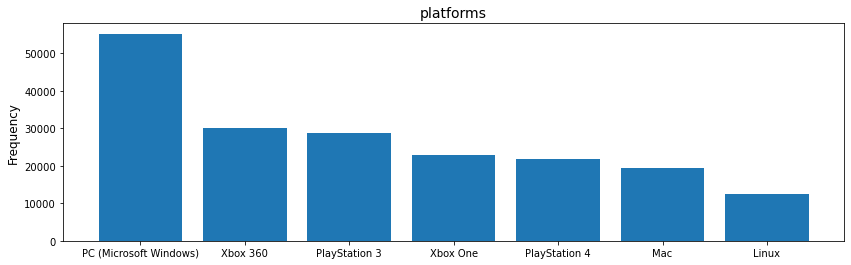

In [9]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(train["platforms"]).value_counts().iloc[:7].index,
        to_1D(train["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

<AxesSubplot:xlabel='rating', ylabel='count'>

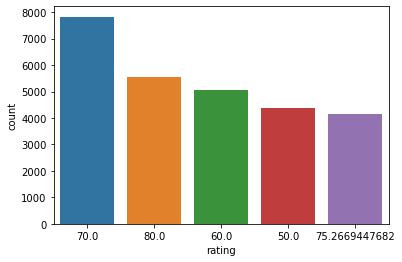

In [11]:
sns.countplot(x='rating', data=train, order=train.rating.value_counts().iloc[:5].index)

<AxesSubplot:xlabel='rating_bin', ylabel='count'>

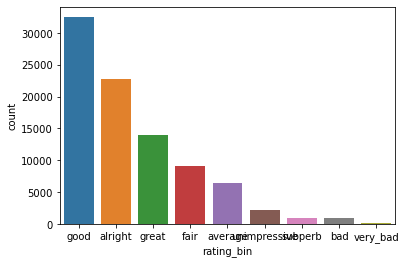

In [12]:
sns.countplot(x='rating_bin', data=train, order=train.rating_bin.value_counts().iloc[:9].index)

## Exploring `good rating`

In [13]:
df_good_rating = train[train['rating_bin']== 'good']
df_good_rating.head()

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
23551,3078,0,2013-10-21 21:16:24,"[13807, 74105, 82858, 90156, 93362, 93363, 935...",1.335744e+09,"[shooter, tactical]",Sniper Elite V2,"[PC (Microsoft Windows), PlayStation 3, Xbox 3...","[6787, 6789, 12580, 105629, 143251, 143252, 33...","[494, 564, 1006, 3077, 5647, 7020, 8366, 9377,...",...,False,0,True,9.0,False,bc474aae-c001-91c1-1960-63066661414f,0,2,0,good
382218,572,0,2011-10-04 10:43:58,"[37676, 72907, 137515, 190175, 210035, 215243,...",1.245197e+09,"[shooter, simulator, strategy, tactical]",ArmA 2,[PC (Microsoft Windows)],[1299],"[241, 277, 343, 451, 564, 1294, 1881, 2942, 58...",...,False,0,True,6.0,False,b98380db-3bd7-46fb-5bd5-5aa0784c1806,0,4,0,good
194182,7696,0,2014-08-27 12:15:08,"[39541, 147091, 1871375]",5.995296e+08,"[point-and-click, adventure]",Manhunter: New York,"[DOS, Mac, Amiga, Atari ST/STE, Apple II, Appl...","[112938, 112939, 112940, 112941, 112942, 112943]","[7697, 13189, 13210, 18011, 25222, 25646, 3599...",...,False,0,False,NaN,False,None,0,0,0,good
402612,6043,0,2014-04-13 18:16:51,"[11465, 73299, 89711, 98662, 147772, 1919594, ...",1.087258e+09,[shooter],Shadow Ops: Red Mercury,"[PC (Microsoft Windows), Xbox]","[27965, 27966, 27967, 27968, 27969, 27970, 279...","[241, 316, 564, 908, 1294, 1372, 1842, 3201, 5...",...,True,0,False,11.0,True,169c879b-3b84-5e63-51e7-9310fb5897cd,2,0,0,good
414065,8908,0,2015-02-02 17:03:06,"[16575, 143945, 1719664, 1919909]",7.257600e+08,"[shooter, platform, adventure]",Alien 3,"[Commodore C64/128/MAX, Amiga, Nintendo Entert...","[26533, 26534, 26535, 26536, 26537, 26538, 216...","[18225, 25646, 55038, 56033, 57187, 68286, 103...",...,False,0,False,19.0,False,81b2e55b-d660-8680-966c-b03265de4799,0,0,0,good


Text(0.5, 1.0, 'platforms')

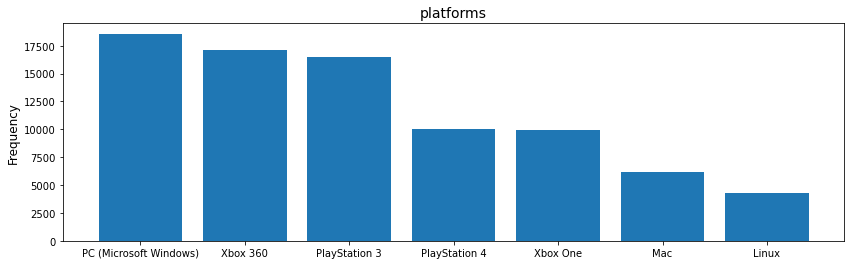

In [17]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- for the ratings "good" the most used platforms is (in order) pc, xbox 360, ps3, ps4

##  Exploring `suberb raitng`

In [18]:
df_subperb_rating = train[train['rating_bin']== 'subperb']
df_subperb_rating.head(3)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
350151,2617,3,2013-07-17 16:09:09,"[43459, 78277]",8.703936e+08,"[real-time-strategy-rts, simulator, strategy]",The Settlers II: Gold Edition,"[DOS, Mac, Nintendo DS]","[194838, 194839, 194840]","[9789, 18623, 20776, 28325, 29173, 31480, 3151...",...,False,0,False,NaN,False,1c2dfca2-6ee8-b54e-b243-05ffb0c646bc,0,0,0,subperb
404391,29207,0,2017-05-20 12:20:49,"[14106, 77210, 85081, 96659, 2136317]",1.133222e+09,[role-playing-rpg],Gothic II: Gold Edition,[PC (Microsoft Windows)],[196063],"[19164, 54775, 81249, 96217, 99118, 101608, 10...",...,False,0,False,NaN,False,None,0,0,0,subperb
413553,59849,9,2017-09-07 18:41:31,"[197757, 210636, 398654, 1237237, 2000741, 211...",1.510618e+09,"[shooter, strategy, adventure]",L.A. Noire,"[PlayStation 4, Xbox One]","[112409, 112410, 135021, 135022, 136102]","[17379, 17548, 18167, 18225, 26574, 27092, 285...",...,False,0,False,NaN,False,None,0,0,0,subperb


> ### Most frequent platforms in the raiting `subperb`

Text(0.5, 1.0, 'platforms')

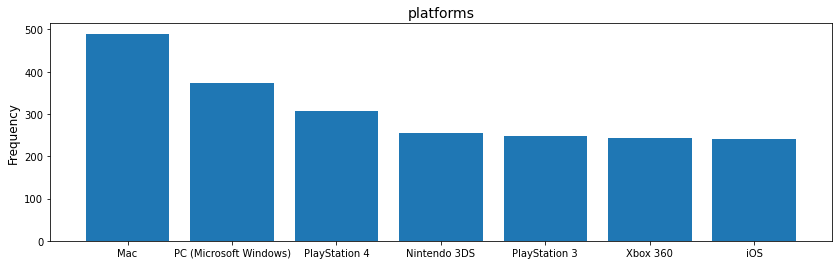

In [19]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- suberb rating is mostly mac and PC top two, and mest three are ps4 and ps3.

## Exploring `great rating`

In [20]:
df_great_rating = train[train['rating_bin']== 'great']
df_great_rating.head(3)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
277283,529,0,2011-07-19 08:20:05,"[12940, 25578, 74170, 79751, 84411, 93406, 934...",1.354061e+09,"[shooter, adventure]",Far Cry 3,"[PC (Microsoft Windows), PlayStation 3, Xbox 360]","[2892, 2893, 2894, 102994, 102995]","[564, 960, 1020, 1121, 1985, 3025, 3042, 5647,...",...,True,0,True,9.0,True,783af69d-f6e9-d605-76de-edfff0d941fe,2,4,0,great
286357,27436,0,2017-02-28 19:05:26,"[75751, 218377, 1048606, 1594300, 1615407, 169...",1.544486e+09,"[role-playing-rpg, simulator, strategy, advent...",Kingdom Two Crowns,"[Linux, PC (Microsoft Windows), Mac, iOS, Play...","[161076, 161077, 161078, 161079, 161080, 31852...","[17548, 25311, 26145, 26574, 27092, 35994, 791...",...,True,0,False,130.0,True,7b20d3b9-73e4-08bb-b0f0-445e5dba1c22,2,0,0,great
64561,295,0,2011-03-17 08:45:25,"[37473, 156771, 247559]",8.486208e+08,"[real-time-strategy-rts, strategy]",Command & Conquer: Red Alert,"[PC (Microsoft Windows), PlayStation, PlayStat...","[173844, 178440, 178441, 178442, 178443, 17844...","[276, 649, 848, 959, 2040, 9363, 9538, 20776, ...",...,False,8,False,6.0,False,45f1ed05-6d40-4b8d-f42c-730db216f9d9,0,0,8,great


Text(0.5, 1.0, 'platforms')

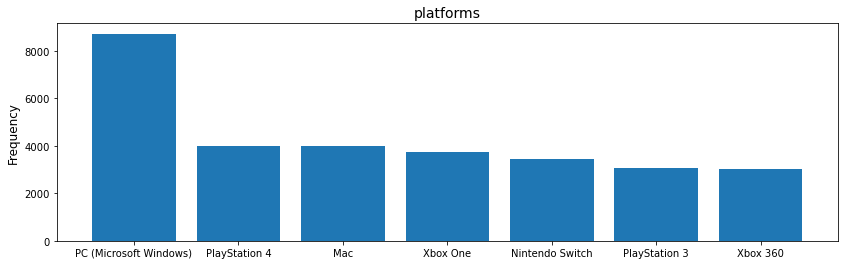

In [21]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [22]:

df_top3_rating = train[(train['rating_bin']== 'great') | (train['rating_bin']== 'good') | (train['rating_bin']== 'subperb')]
df_top3_rating.head(1)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
277283,529,0,2011-07-19 08:20:05,"[12940, 25578, 74170, 79751, 84411, 93406, 934...",1.354061e+09,"[shooter, adventure]",Far Cry 3,"[PC (Microsoft Windows), PlayStation 3, Xbox 360]","[2892, 2893, 2894, 102994, 102995]","[564, 960, 1020, 1121, 1985, 3025, 3042, 5647,...",...,True,0,True,9.0,True,783af69d-f6e9-d605-76de-edfff0d941fe,2,4,0,great


## These are the top 7 platforms for the three best ratings (good, great, subperb)

Text(0.5, 1.0, 'platforms')

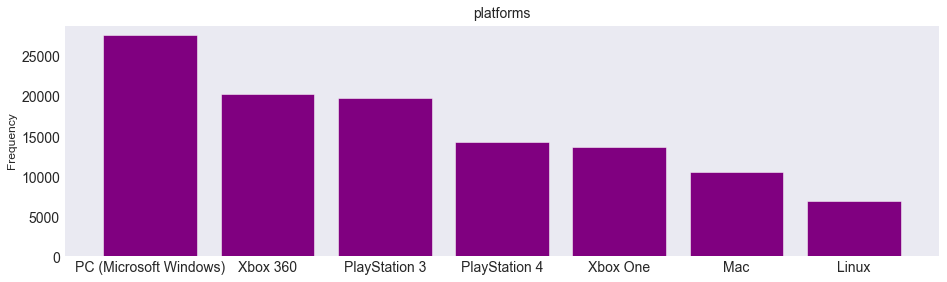

In [38]:
fig, ax = plt.subplots(figsize = (14,4))
sns.set_style("dark")
ax.bar(to_1D(df_top3_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_top3_rating["platforms"]).value_counts().iloc[:7].values,
          color= ['purple'])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - X-Box 360
    - ps 3 and 4 
    - X-box 1

## These are the top 7 platforms for the lowest  ratings (bad, very bad , awful)

In [39]:
df_low3_rating = df2[(df2['rating_bin']== 'bad') | (df2['rating_bin']== 'very bad') | (df2['rating_bin']== 'awful')]
df_low3_rating.head(1)

,id,category,created_at,external_games,first_release_date,genres,name,platforms,release_dates,similar_games,...,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
1909,30886,0,2017-05-23,"[2456, 1993129]",1.480982e+09,"[adventure, indie]",Time Of Silence,[PC (Microsoft Windows)],[73864],"[28277, 37419, 55282, 75948, 81275, 106992, 10...",...,False,0,False,NaN,False,None,0,0,0,bad


Text(0.5, 1.0, 'platforms')

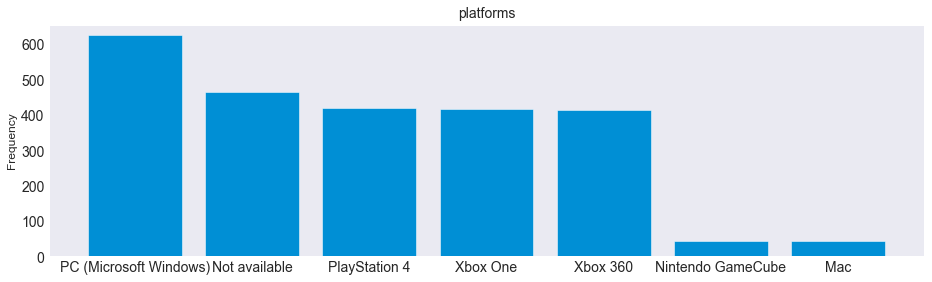

In [40]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

# Q2- what is the most common genre in games that are `subperb` (the highest rating)

- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

In [ ]:
df_subperb_rating

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_subperb_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_subperb_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genre", size = 14)

>- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

## Q 2.1 what about the three highest ratings (good, great, subperb) ? what is the overall most highest genre

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)

## Q 2.2 what about the three lowest ratings ((bad, very bad , awful)) ? what is the overall most highest genre in these low rating games?

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

# Q3- what is the most common theme in games that are subperb (the highest rating)

Answer - the most common themes in the subperb is action, fantasy, science fiction, historical.

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_great_rating["themes"]).value_counts().iloc[:7].index,
        to_1D(df_great_rating["themes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("themes", size = 14)

## Q3.1- what is the most common theme in games that are three highest ratings (good, great, subperb)?

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].index,
        to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Themes", size = 14)

## Q3.1- what is the most common theme in games that are three lowest ratings ((bad, very bad , awful)) ?

In [ ]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_low3_rating["themes"]).value_counts().iloc[:7].index,
        to_1D(df_low3_rating["themes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Themes", size = 14)

# Q4-  Do users rate games with online multiplayer modes higher than games that lack online multiplayer modes?

> since there is a gap time from game that can be played online and games that cannot- we decided to remove that gap and make sure that the games all come out in the same time period


### _answer:_ even after removing that time gap the games that are `NOT` multiplayer online games are rated higher than non-multiplayer games

In [ ]:
df2.head(2)

>## Not online multi

In [ ]:
#making sure all games are comming out of the same time period
train['created_at'] = pd.to_datetime(train['created_at'],unit='s')

In [ ]:
train.onlinecoop.value_counts()

In [ ]:
NOT_online_multi = train[train['onlinecoop']== False]
NOT_online_multi.head(1)

In [ ]:
NOT_online_multi['first_release_date'] = pd.to_datetime(NOT_online_multi['first_release_date'],unit='s')

In [ ]:
NOT_online_multi.head()

In [ ]:
NOT_online_multi.first_release_date.value_counts()

In [ ]:
NOT_online_multi['first_release_date_year'] = NOT_online_multi.first_release_date.dt.year

In [ ]:
NOT_online_multi.first_release_date_year.value_counts()

In [ ]:
NOT_online_multi.head()

In [ ]:
#1981 is the lowest date in online i will it cut it off there 

In [ ]:
NOT_online_multi = NOT_online_multi[NOT_online_multi['first_release_date_year'] > 1981.0]
NOT_online_multi.head(1)

In [ ]:
NOT_online_multi.first_release_date_year.value_counts()

## Not online multi-player that games are after 1981

In [ ]:
plt.figure(figsize=(12,5))
c = sns.countplot(x='rating_bin', data=NOT_online_multi)

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (1, 5),
                 textcoords = 'offset points')

>##  online multi

In [ ]:
df_online_multi = df2[df2['onlinecoop']== True]
df_online_multi.head(1)

## Games that are after 1981 - Ratings 

In [ ]:
plt.figure(figsize=(12,5))
c = sns.countplot(x='rating_bin', data=df_online_multi)

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (1, 5),
                 textcoords = 'offset points')

### figuring out the time period for online games

In [ ]:
df_online_multi['first_release_date'] = pd.to_datetime(df_online_multi['first_release_date'],unit='s')

In [ ]:
df_online_multi.head(1)

In [ ]:
df_online_multi['first_release_date_year'] = df_online_multi.first_release_date.dt.year

In [ ]:
df_online_multi.first_release_date_year.value_counts()

 # Q 4- Does a certain game_mode determine the game rating?

# preparing for modeling the data pt 2

In [ ]:
genres_dict

In [ ]:
# loop through genres list

In [ ]:
# list of genres to add
items = ['point-and-click', 'fighting', 'shooter', 'music', 'platform', 'puzzle', 'racing', 'real-time-strategy-rts', 'role-playing-rpg', 'simulator', 'sport', 'strategy', 'turn-based-strategy-tbs', 'tactical', 'hack-and-slash-beat-em-up', 'quiz-trivia', 'pinball', 'adventure', 'indie', 'arcade', 'visual-novel', 'card-and-board-game', 'moba']
# function to loop through column list and check for genre
def my_list(column, word):
    if word in column:
        return 1
    else:
        return 0

In [ ]:
for item in items:
    game_library[item] = game_library['genres'].apply(my_list, word=item)

In [ ]:

game_library.head()

In [ ]:
platform_dict

In [ ]:
# Adding platforms to game_library

In [ ]:
# list of platformd to add
platforms = ['Linux', 'Nintendo 64', 'Wii', 'PC (Microsoft Windows)', 'PlayStation', 'PlayStation 2', 'PlayStation 3', 'Xbox', 'Xbox 360', 'DOS', 'Mac', 'Nintendo Entertainment System', 'Super Nintendo Entertainment System', 'Nintendo DS', 'Nintendo GameCube', 'Game Boy Color', 'Game Boy Advance', 'Sega Mega Drive/Genesis','Sega Saturn', 'Game Boy', 'Android', 'Nintendo 3DS','PlayStation Portable', 'iOS', 'Wii U', 'PlayStation Vita', 'Virtual Console (Nintendo)', 'PlayStation 4', 'Xbox One', 'Family Computer Disk System', 'Arcade', 'Windows Phone', 'Apple II', 'Web browser', 'Odyssey', 'Commodore 16', 'New Nintendo 3DS']


In [ ]:
# function to loop through column list and check for genre
def my_list(column, word):
    if word in column:
        return 1
    else:
        return 0

In [ ]:
for platform in platforms:
    game_library[platform] = game_library['platforms'].apply(my_list, word=platform)

In [ ]:
game_library.head()

## Add theams to game library

In [ ]:
themes = ['Thriller', 'Science fiction', 'Action', 'Horror', 'Survival', 'Fantasy', 'Historical', 'Stealth', 'Comedy', 'Business', 'Drama', 'Non-fiction', 'Kids', 'Sandbox', 'Open world', 'Warfare', 'Educational', 'Mystery', 'Party', 'Romance', 'Erotic']

def my_list_themes(column, word):
    if word in column:
        return 1
    else:
        return 0

In [ ]:
for theme in themes:
    game_library[theme] = game_library['themes'].apply(my_list_themes, word=theme)

In [ ]:
game_library.head()

## Add player perspective

In [ ]:
players = ['First person', 'Third person', 'Bird view / Isometric', 'Text', 'Side view', 'Virtual Reality', 'Auditory'  'Drama']

def my_list_player(column, word):
    if word in column:
        return 1
    else:
        return 0

In [ ]:
for player in players:
    game_library[player] = game_library['player_perspectives'].apply(my_list_player, word=player)


In [ ]:
game_library.head()

## Add game modes

In [ ]:
modes = ['single-player', 'multiplayer', 'co-operative', 'split-screen', 'massively-multiplayer-online-mmo', 'battle-royale']

def my_list(column, word):
    if word in column:
        return 1
    else:
        return 0

In [ ]:
for mode in modes:
    game_library[mode] = game_library['player_perspectives'].apply(my_list, word=mode)

## turn dlc column into boolean column


In [ ]:
game_library['dlcs'] = game_library['dlcs'].fillna(0)
game_library.head()

In [ ]:
def dlcs_col(df):
    game_library['has_dlcs'] = np.where(game_library.dlcs == 0, 1, 0)  
    return df

In [ ]:
game_library = dlcs_col(game_library)

In [ ]:
game_library.has_dlcs.head()

In [ ]:
game_library = game_library.drop(columns=['websites', 'collection', 'external_games', 'updated_at', 'artworks', 'genres', 'platforms', 'similar_games', 'tags', 'release_dates', 'cover','screenshots', 'videos', 'checksum_x', 'alternative_names', 'rating_count', 'total_rating_count', 'version_parent', 'hypes', 'url', 'franchises', 'follows', 'aggregated_rating_count', 'game_modes', 'player_perspectives', 'themes', 'game_engines', 'keywords', 'storyline', 'version_title', 'follows', 'bundles', 'franchise', 'checksum_y', 'second_id', 'offlinecoopmax', 'onlinecoopmax', 'onlinecoopmax'])
game_library.shape

In [ ]:
game_library = game_library.drop(columns=['remasters', 'summary', 'age_ratings', 'involved_companies', 'status', 'aggregated_rating', 'total_rating', 'remakes', 'ports', 'parent_game', 'aggregated_rating', 'multiplayer_modes', 'expansions', 'expanded_games', 'forks', 'standalone_expansions', 'second', 'version_description', 'title_version'])

In [ ]:
game_library.head()

In [ ]:
game_library['rating_bin'] = pd.cut(game_library.rating, 
                           bins = [0,10,20, 30, 40, 50, 60, 70, 80, 90, 100],
                           labels = ['awful','very_bad','bad','unimpressive','average','fair','alright','good','great', 'subperb'])

In [ ]:

game_library.slug.head()


In [ ]:
game_library = game_library.drop(columns=['platform'])
game_library.shape


In [ ]:
game_library.shape

In [ ]:
game_library.head()

In [ ]:
game_library = game_library.drop(columns=['name'])


In [ ]:
game_library['slug'] = game_library['slug'].str.replace('-',' ')


In [ ]:
#game_library["slug"] = pd.to_numeric(game_library["slug"], downcast="float")

## Dataframe with ratings

In [ ]:
game_library.campaigncoop.value_counts()

In [ ]:
game_library.dropin.value_counts()

In [ ]:
game_ratings = pd.read_json("game_ratings.json")

In [ ]:
game_ratings

In [ ]:
game_ratings = game_library[game_library['rating_bin'].notnull()]
game_ratings.shape

In [ ]:
game_ratings.slug.info()


In [ ]:
game_ratings

In [ ]:
game_ratings = game_ratings.drop(columns=['slug'])


In [ ]:
game_ratings_df = game_ratings.to_json(orient='index')
print(game_ratings_df)

In [ ]:
print(game_ratings_df)

In [ ]:
def split(game_ratings, stratify_by='rating_bin'):
    # split df into train_validate 
    train_validate, test = train_test_split(game_ratings, test_size=.20, random_state=13)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

    X_train = train.drop(columns=['rating_bin'])
    y_train = train[['rating_bin']]

    X_validate = validate.drop(columns=['rating_bin'])
    y_validate = validate[['rating_bin']]

    X_test = test.drop(columns=['rating_bin'])
    y_test = test[['rating_bin']]

    return train, X_train, X_validate, X_test, y_train, y_validate, y_test

In [ ]:
train, X_train, X_validate, X_test, y_train, y_validate, y_test = split(game_ratings, stratify_by='rating') #split data
train.head()


In [ ]:
import os
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [ ]:
def feature_chi2(X_train, X_validate, X_test, y_train, k = 21):
     
    # Feature selection
    fs = SelectKBest(score_func = chi2, k = k)
    fs.fit(X_train, y_train)
    
    # Selected columns
    cols = fs.get_support(indices = True)
    
    # Output data
    X_train_fs = X_train.iloc[:, cols]
    X_validate_fs = X_validate.iloc[:, cols]
    X_test_fs = X_test.iloc[:, cols]
    
    return X_train_fs, X_validate_fs, X_test_fs

In [ ]:
X_train_fs, X_validate_fs, X_test_fs = feature_chi2(X_train, X_validate, X_test, y_train, k = 21) # fitting the df to the function 
X_train_fs.head()

In [ ]:
# def split(game_ratings, stratify_by='rating_bin'):
#     # split df into train_validate 
#     train_validate, test = train_test_split(game_ratings, test_size=.20, random_state=13)
#     train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

#     X_train = train.drop(columns=['rating_bin'])
#     y_train = train[['rating_bin']]

#     X_validate = validate.drop(columns=['rating_bin'])
#     y_validate = validate[['rating_bin']]

#     X_test = test.drop(columns=['rating_bin'])
#     y_test = test[['rating_bin']]

#     return train, X_train, X_validate, X_test, y_train, y_validate, y_test

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 8 features
f_selector = SelectKBest(f_regression, k=8)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()



In [ ]:
def replace_boolean(data):
    for col in data:
        data[col].replace(True, 1, inplace=True)
        data[col].replace(False, 0, inplace=True)

replace_boolean(test)

In [ ]:
df3 = game_library[game_library['rating'].isnull()]
df3.shape

### Read the CSV for games 

In [ ]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
game_library.shape

In [ ]:
game_library = game_library.drop(columns=['websites', 'created_at', 'updated_at', 'artworks', 'cover','screenshots', 'videos', 'checksum', 'alternative_names', 'rating_count', 'total_rating_count', 'version_parent', 'hypes', 'franchises', 'follows', 'aggregated_rating_count'])
game_library.shape

In [ ]:
game_library.shape

In [ ]:
game_library.rename(columns={'slug': 'lower_case_name', 'aggregated_rating': 'critic_rating'}, inplace=True)
game_library.head()

### Dataframe with ratings

In [ ]:
df2 = df[df['rating'].notnull()]
df2.head()

In [ ]:
df2.rating.isnull().sum()

### Dataframe with nulls in rating column 

In [ ]:
df3 = df[df['rating'].isnull()]
df3.shape